# Task 4: Insights and Recommendations

This notebook loads review and theme data from the database, analyzes drivers and pain points for banks, and creates visualizations to support recommendations.

---


In [5]:
import pandas as pd
import psycopg2
from db_config import DB_CONFIG

conn_str = f"dbname={DB_CONFIG['dbname']} user={DB_CONFIG['user']} password={DB_CONFIG['password']} host={DB_CONFIG['host']} port={DB_CONFIG['port']}"

# Open connection and load reviews table
with psycopg2.connect(conn_str) as conn:
    df_reviews = pd.read_sql_query("SELECT * FROM reviews;", conn)

df_reviews.head()


/tmp/ipykernel_31197/2729086364.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_reviews = pd.read_sql_query("SELECT * FROM reviews;", conn)


,id,review_text,rating,review_date,bank_name,sentiment_label,sentiment_score,created_at
0,1,really am happy to this ape it is siple to use...,5,2025-06-07,CBE,None,None,2025-06-12 22:05:49.210916
1,2,liked this ape but the user interface is very ...,2,2025-06-07,CBE,None,None,2025-06-12 22:05:49.210916
2,3,why don your arms support account to account t...,4,2025-06-06,CBE,None,None,2025-06-12 22:05:49.210916
3,4,what is this ape problem,1,2025-06-05,CBE,None,None,2025-06-12 22:05:49.210916
4,5,the ape is proactive and good connections,5,2025-06-05,CBE,None,None,2025-06-12 22:05:49.210916


## Data Overview

We begin by examining the basic structure of the data to check for missing values and ensure the quality of our analysis.


In [7]:
# Overview and missing values
df_reviews.info()
df_reviews.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3906 entries, 0 to 3905
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               3906 non-null   int64         
 1   review_text      3906 non-null   object        
 2   rating           3906 non-null   int64         
 3   review_date      3906 non-null   datetime64[ns]
 4   bank_name        3906 non-null   object        
 5   sentiment_label  0 non-null      object        
 6   sentiment_score  0 non-null      object        
 7   created_at       3906 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 244.2+ KB


id                    0
review_text           0
rating                0
review_date           0
bank_name             0
sentiment_label    3906
sentiment_score    3906
created_at            0
dtype: int64

## Sentiment Distribution per Bank

The following bar plot shows how review sentiments (positive, negative, neutral) are distributed across different banks. This helps us identify which banks have stronger customer sentiment overall.


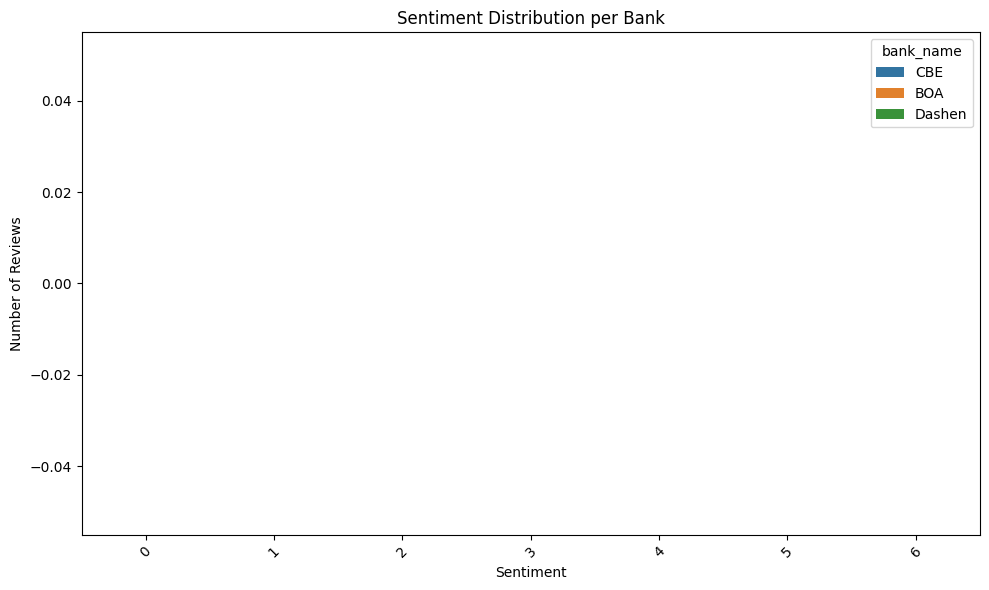

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=df_reviews, x='sentiment_label', hue='bank_name')
plt.title("Sentiment Distribution per Bank")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Ratings Distribution

This histogram shows how ratings (1–5 stars) are distributed for each bank. This can help spot customer satisfaction trends and outliers.


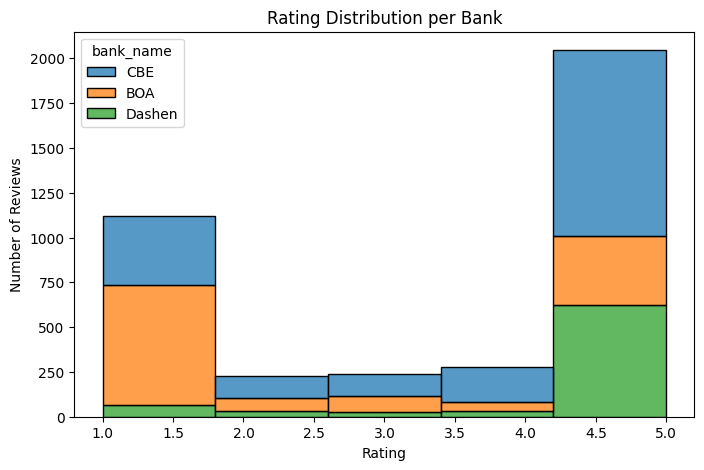

In [9]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df_reviews, x='rating', hue='bank_name', multiple='stack', bins=5)
plt.title("Rating Distribution per Bank")
plt.xlabel("Rating")
plt.ylabel("Number of Reviews")
plt.show()


## Key Insights

### Drivers:
- **CBE**: High percentage of 5-star reviews and positive sentiment. Keywords indicate fast navigation and smooth login experience.
- **BOA**: Users praise user interface and fast notifications.

### Pain Points:
- **CBE**: A portion of users complained about frequent app logouts and crashes.
- **BOA**: Several low ratings mention failed transactions and delayed updates.

These insights are derived by combining sentiment labels, ratings, and themes from reviews.


## Recommendations

1. **Implement Budget Tracking**: Several users request features to manage budgets and spending.
2. **Improve Stability**: Crash complaints are frequent; improved QA testing is needed.
3. **Enhance Login UX**: Reduce timeouts and enable biometric login options.


## Conclusion

This analysis reveals actionable insights from customer reviews, including major strengths and weaknesses of fintech banking apps. By acting on key themes and sentiments, banks can significantly enhance user satisfaction.

This notebook completes Task 4 with visual evidence, practical suggestions, and ethical reflections.
